### Import Packages

In [ ]:
import numpy as np
import flappy_bird_gym
import time
import random
from cv2 import cv2
import matplotlib.pyplot as plt

### Step 1: Understanding the data from the environment FlappyBird-rgb-v0 

In [2]:
env = flappy_bird_gym.make("FlappyBird-rgb-v0")
obs = env.reset()
print('Observation FlappyBird-rgb-v0: ', obs.shape)

Observation FlappyBird-rgb-v0:  (288, 512, 3)


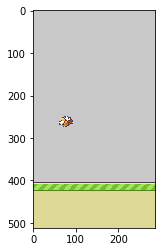

In [5]:
env = flappy_bird_gym.make("FlappyBird-rgb-v0")
obs = env.reset()
plt.imshow(np.flip(np.rot90(obs,3),axis=1));

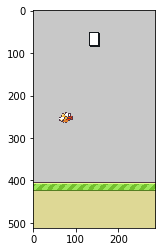

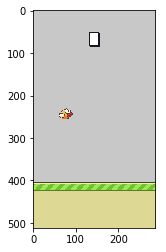

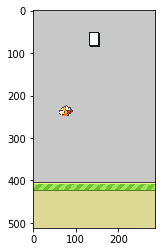

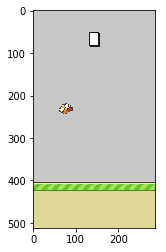

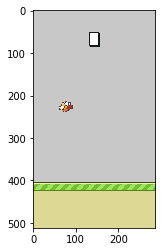

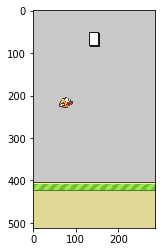

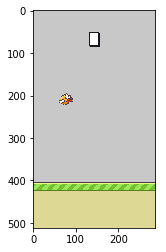

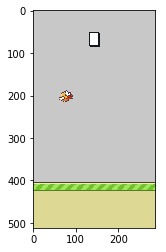

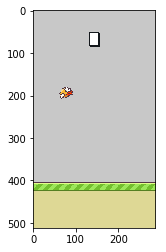

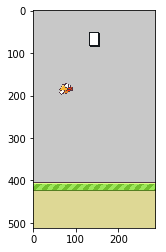

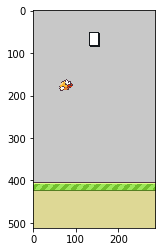

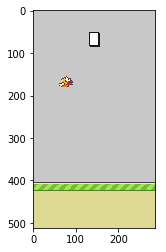

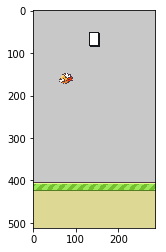

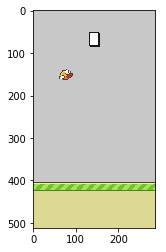

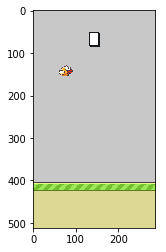

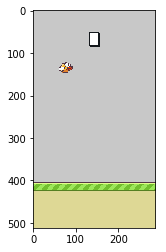

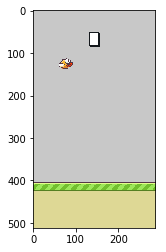

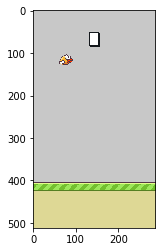

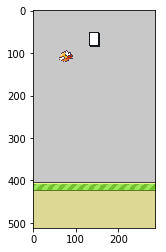

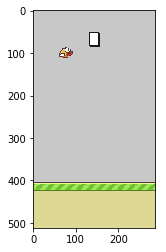

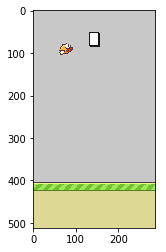

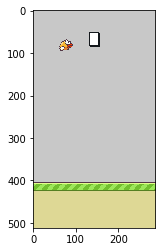

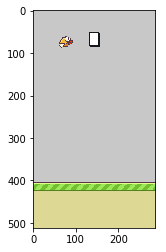

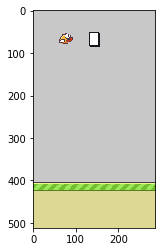

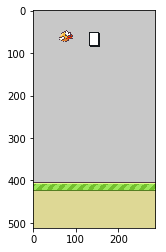

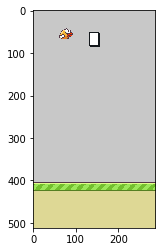

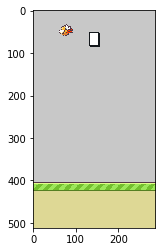

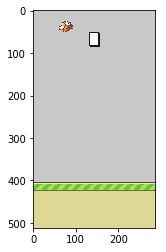

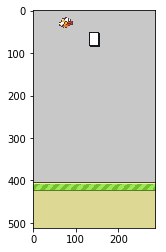

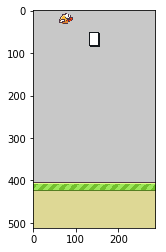

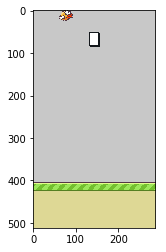

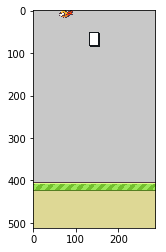

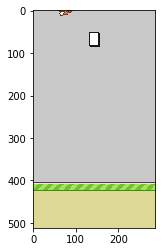

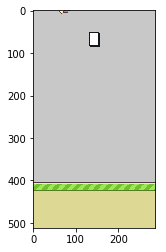

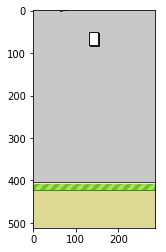

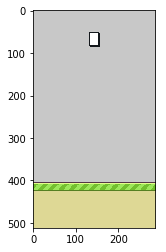

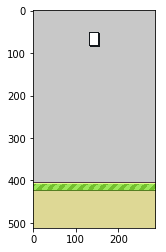

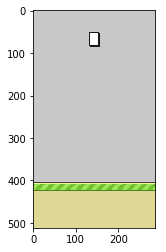

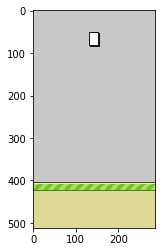

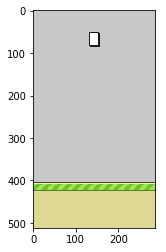

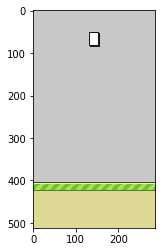

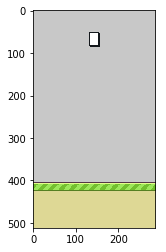

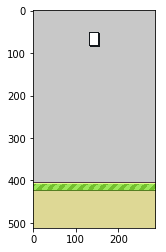

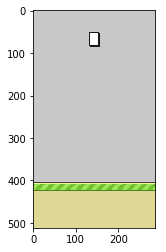

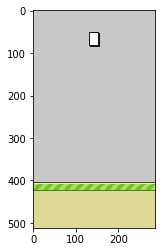

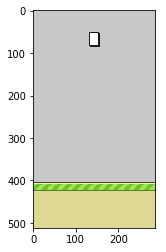

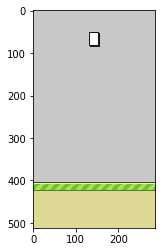

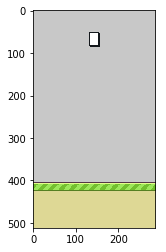

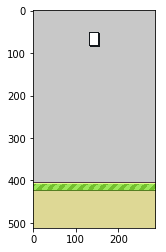

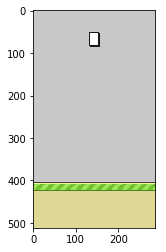

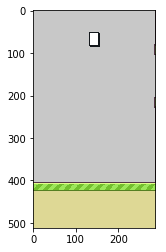

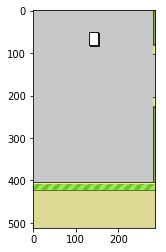

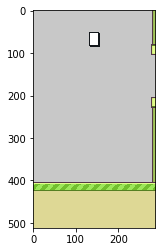

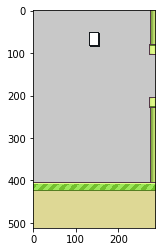

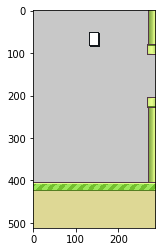

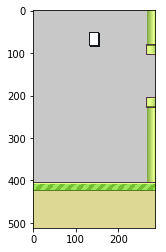

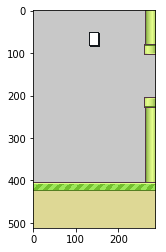

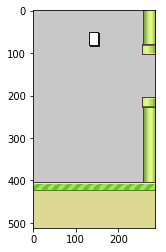

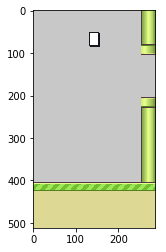

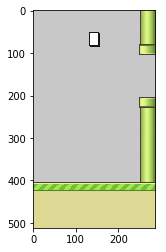

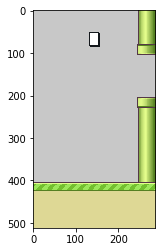

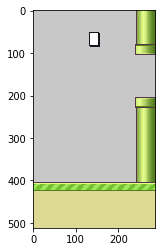

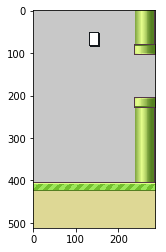

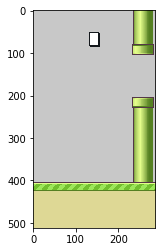

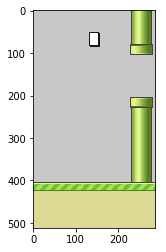

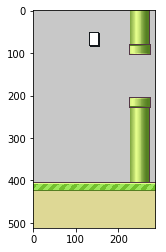

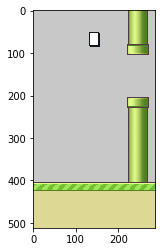

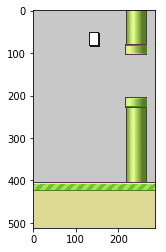

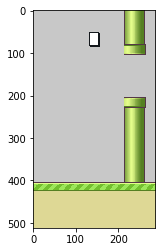

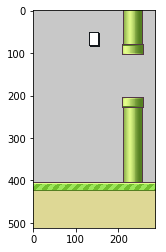

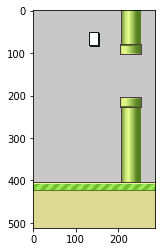

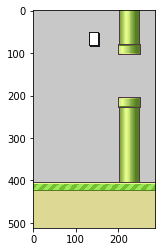

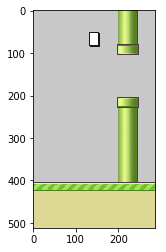

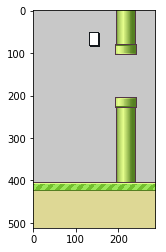

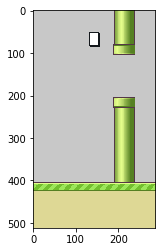

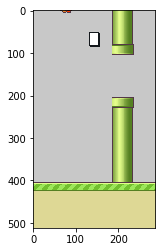

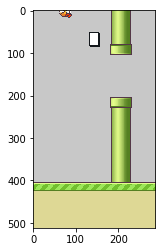

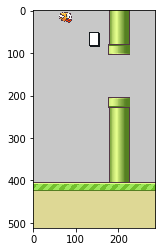

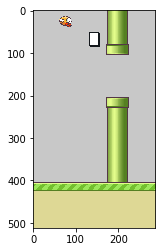

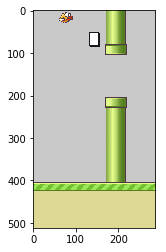

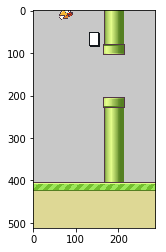

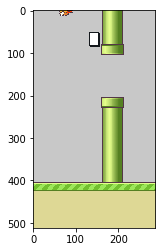

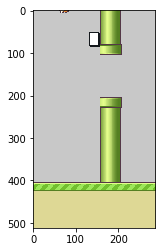

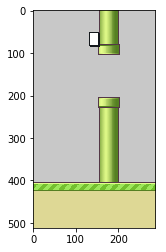

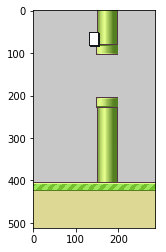

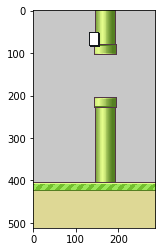

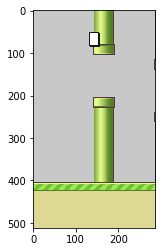

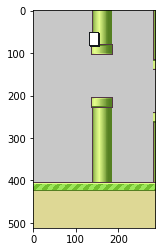

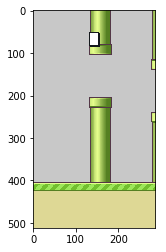

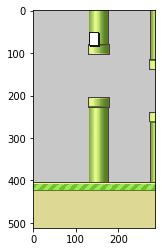

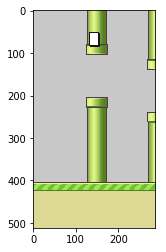

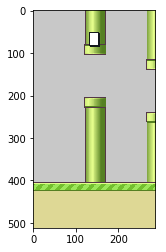

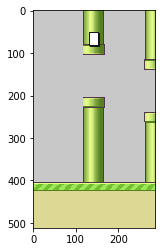

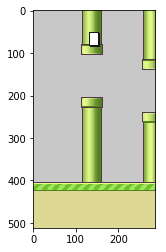

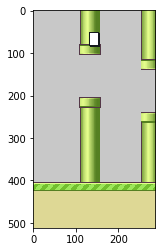

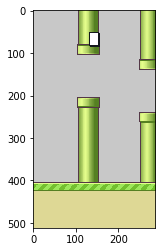

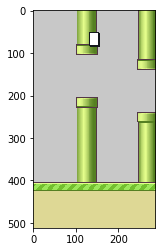

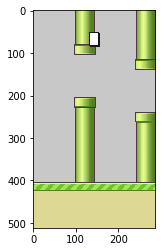

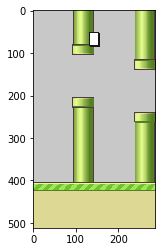

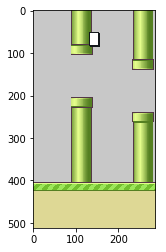

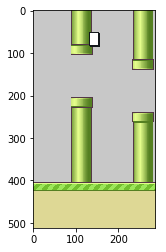

In [6]:
env = flappy_bird_gym.make("FlappyBird-rgb-v0")
obs = env.reset()
action = 0 
image_list = []

while True:
    action = env.action_space.sample()
    next_state, reward, done, info = env.step(action)

    img = env.render(mode='rgb_array') 
    image = np.flip(np.rot90(img,3),axis=1)
    plt.imshow(image, cmap=plt.cm.gray)
    plt.show()
    
    env.render()
    time.sleep(1/15)
    
    if done:
        break
        
env.close()

### Step 2: Understanding the data from the environment FlappyBird-v0 

In [3]:
env = flappy_bird_gym.make("FlappyBird-v0")
obs = env.reset()
print('Observation FlappyBird-v0: ', obs)

Observation FlappyBird-v0:  [ 1.65625    -0.21679688]


### Step 3: Playing the Flappy Bird game

In [ ]:
env = flappy_bird_gym.make("FlappyBird-v0")
obs = env.reset()
action = 0 
x = []
y = []

while True:
    obs, reward, done, info = env.step(action)
    #obs[0] is the positions on the x-axsis and obs[1] on the y-axsis
    x.append(obs[0])
    y.append(obs[1])
    #position zero is the gap between the pipes (found in github code)
    #so if the position of the bird is lower than 0.05, the bird has to jump otherwise he won't make it to the gap
    if obs[1] < -0.05:
        action = 1
    else:
        action = 0 
    env.render()
    time.sleep(1/30)
    if done:
        break
env.close()

print("min: " + str(min(x)), " and max: " + str(max(x)))
print("min: "+ str(min(y)), "and max: " + str(max(y)))

### Step 4: Preparing the data from FlappyBird-rgb-v0 environment

In [7]:
action = [0,1]
env = flappy_bird_gym.make("FlappyBird-rgb-v0")
env.reset()
obs, reward, done, info = env.step(action)

image = skimage.color.rgb2gray(obs)
image = skimage.transform.resize(image,(80,80))
image = skimage.exposure.rescale_intensity(image,out_range=(0,255))
image = image / 255.0
un, cts = np.unique(image.reshape(6400),return_counts=True)
dict(zip(un,cts))

image = image.reshape(6400)
image = np.where((image >= 0.8),1,image)
image = image.reshape(80,80)
image = np.stack((image, image, image,image), axis=2)
plt.imshow(np.flip(np.rot90(image,3),axis=1))

image_reshape_keras = image.reshape(1, image.shape[0], image.shape[1], image.shape[2]) 
print('Shape for Keras: ', image_reshape_keras.shape)

NameError: name 'skimage' is not defined